In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

In [25]:
image_path = '/mnt/d/projects/stock_v2510/src/bottom_reversal_breakout/dataset_3/image5.png'

In [26]:
image = cv2.imread(image_path)

In [27]:
image.shape

(530, 682, 3)

In [28]:
import cv2

# 获取原始高、宽
h, w = image.shape[:2]

# 定义目标尺寸
target_size = 768

# 计算缩放比例 (目标尺寸 / 最大边)
scale = target_size / max(h, w)

# 计算新的宽和高
new_w = int(w * scale)
new_h = int(h * scale)

# 进行缩放
# 因为是放大（从 682 放大到 768），建议使用 INTER_CUBIC 效果更好
image_resize = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)

print(f"原图尺寸: {w}x{h}")
print(f"新图尺寸: {new_w}x{new_h}")

原图尺寸: 682x530
新图尺寸: 768x596


In [29]:
image_resize.shape

(596, 768, 3)

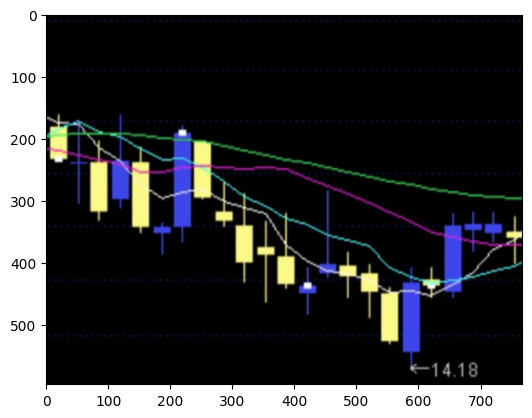

In [30]:
plt.imshow(image_resize)

In [31]:
cv2.imwrite(image_path.replace('.png','_resize.png'), image_resize)


True

In [37]:
x = np.arange(23)
y = np.random.randint(0, 20, x.shape)

In [38]:
x.shape,y.shape

((23,), (23,))

In [39]:
for x_i,y_i in zip(x,y):
    print(x_i,":",y_i,end="\t\t")
    if x_i % 5 == 4:
        print()

0 : 17		1 : 18		2 : 10		3 : 5		4 : 1		
5 : 5		6 : 1		7 : 11		8 : 12		9 : 11		
10 : 13		11 : 0		12 : 15		13 : 9		14 : 9		
15 : 9		16 : 12		17 : 3		18 : 2		19 : 10		
20 : 17		21 : 11		22 : 5		

(0.0, 20.0)

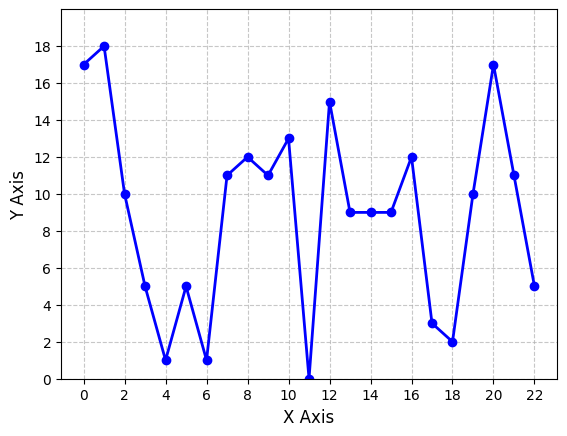

In [43]:
# 绘制折线图
plt.plot(x, y, 'bo-', linewidth=2, markersize=6)  # 蓝色带点的实线

# ==== 关键：添加网格线 ====
plt.grid(True, linestyle='--', alpha=0.7)  # 虚线网格，半透明

# 可选：美化设置
plt.xlabel('X Axis', fontsize=12)
plt.ylabel('Y Axis', fontsize=12)
plt.xticks(range(0, x.shape[0], 2))  # X轴刻度每5个单位显示
plt.yticks(range(0, np.max(y) + 2, 2))  # Y轴刻度每2个单位显示
plt.ylim(0, 20)  # Y轴范围

In [4]:
import pandas as pd

In [5]:
df = pd.read_excel("/mnt/d/projects/stock_v2510/data/temp1/600031.xls")

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [46]:
pip install yfinance pandas

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 25.1 MB/s  0:00:00 eta 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=9c604b9a3465732e268ac5eed0036ce63ed36278b4c9c144b3ad617c684da4aa
  Stored in directory: /home/shangong/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
Successfully built multitasking
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [yfinance]3/4 [yfinance]
Note: you may need to restart the kernel to use updated packages.


In [22]:
import yfinance as yf

# 1. 定义股票代码（注意后缀是 .SS）
ticker_symbol = ["600031.SS","600036.SS"]

# 2. 获取数据
# period: 时间范围 (1d, 5d, 1mo, 1y, ytd, max 等)
# interval: 时间间隔 (1m, 2m, 5m, 1h, 1d, 1wk 等)
data = yf.download(ticker_symbol, period="1y", interval="1d")

# 3. 查看数据
print("数据前 5 行：")
print(data.head())

# 4. 提取特定的列（如收盘价）
# 注意：yfinance 返回的是 pandas DataFrame
close_prices = data['Close']
print("\n最近 5 天收盘价：")
print(close_prices.tail())

[*********************100%***********************]  2 of 2 completed

数据前 5 行：
Price           Close                  High                   Low             \
Ticker      600031.SS  600036.SS  600031.SS  600036.SS  600031.SS  600036.SS   
Date                                                                           
2024-12-30  16.129721  37.977379  16.187741  38.149916  16.004008  37.622720   
2024-12-31  15.936316  37.670647  16.197410  38.245773  15.936316  37.670647   
2025-01-02  15.249742  36.913399  15.936317  37.862356  15.172380  36.750449   
2025-01-03  15.085350  37.057178  15.472154  37.421425  15.036999  36.942155   
2025-01-06  15.066010  37.431011  15.191721  37.478938  14.911288  36.549156   

Price            Open               Volume            
Ticker      600031.SS  600036.SS 600031.SS 600036.SS  
Date                                                  
2024-12-30  16.052360  37.708989  41851828  67884533  
2024-12-31  16.110378  37.919869  51515564  64371699  
2025-01-02  15.936317  37.718573  85389428  64200070  
2025-01-03  15.32710

In [23]:
data.columns

MultiIndex([( 'Close', '600031.SS'),
            ( 'Close', '600036.SS'),
            (  'High', '600031.SS'),
            (  'High', '600036.SS'),
            (   'Low', '600031.SS'),
            (   'Low', '600036.SS'),
            (  'Open', '600031.SS'),
            (  'Open', '600036.SS'),
            ('Volume', '600031.SS'),
            ('Volume', '600036.SS')],
           names=['Price', 'Ticker'])

In [18]:
import yfinance as yf
import pandas as pd

# 1. 设置股票代码（三一重工）
ticker_symbol = "600031.SS"

# 2. 下载历史行情数据 (至少需要 60 天以上的数据来计算 MA60)
# auto_adjust=True 会自动处理复权
df = yf.download(ticker_symbol, period="1y", interval="1d", auto_adjust=True)

# 3. 计算均线 (Moving Averages)
# rolling(window=n) 表示计算过去 n 天的滑动窗口
# df['MA5'] = df['Close'].rolling(window=5).mean()
# df['MA20'] = df['Close'].rolling(window=20).mean()
# df['MA60'] = df['Close'].rolling(window=60).mean()

# # 4. 打印最后 10 行查看结果（包含均线）
# print(df.tail(10))

# # 5. 可选：保存到 Excel
# # df.to_excel("600031_with_ma.xlsx")

[*********************100%***********************]  1 of 1 completed


In [19]:
df.columns,df.values[:1]

(MultiIndex([( 'Close', '600031.SS'),
             (  'High', '600031.SS'),
             (   'Low', '600031.SS'),
             (  'Open', '600031.SS'),
             ('Volume', '600031.SS')],
            names=['Price', 'Ticker']),
 array([[1.61297207e+01, 1.61877407e+01, 1.60040084e+01, 1.60523600e+01,
         4.18518280e+07]]))

In [8]:
import mplfinance as mpf
import pandas as pd

In [13]:
df.values[:1]

array([[1.61297207e+01, 1.61877407e+01, 1.60040084e+01, 1.60523600e+01,
        4.18518280e+07,            nan,            nan,            nan]])

In [10]:
mpf.plot(df, type='candle', style='charles', volume=True)

ValueError: Data for column "Open" must be ALL float or int.

In [31]:
import yfinance as yf

ticker_symbol = "600031.SS"

# 使用 Ticker 类
stock = yf.Ticker(ticker_symbol)

# 获取历史数据
data = stock.history(period="1y", interval="1d")

# 1. 把它变成一列
data.reset_index(inplace=True)

# 2. 去掉时区信息（变成纯净的 2024-12-30 00:00:00）
data['Date'] = data['Date'].dt.tz_localize(None)

# 3. (可选) 如果你只想要 YYYY-MM-DD 的字符串格式
data['Date_str'] = data['Date'].dt.strftime('%Y-%m-%d')
# 打印看看，现在的列名就是标准的 Open, High, Low, Close...
print(data.head())

        Date       Open       High        Low      Close    Volume  Dividends  \
0 2024-12-30  16.052360  16.187741  16.004008  16.129721  41851828        0.0   
1 2024-12-31  16.110378  16.197410  15.936316  15.936316  51515564        0.0   
2 2025-01-02  15.936317  15.936317  15.172380  15.249742  85389428        0.0   
3 2025-01-03  15.327102  15.472154  15.036999  15.085350  53403371        0.0   
4 2025-01-06  15.085350  15.191721  14.911288  15.066010  45487382        0.0   

   Stock Splits    Date_str  
0           0.0  2024-12-30  
1           0.0  2024-12-31  
2           0.0  2025-01-02  
3           0.0  2025-01-03  
4           0.0  2025-01-06  


In [32]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date_str
0,2024-12-30,16.052360,16.187741,16.004008,16.129721,41851828,0.0,0.0,2024-12-30
1,2024-12-31,16.110378,16.197410,15.936316,15.936316,51515564,0.0,0.0,2024-12-31
2,2025-01-02,15.936317,15.936317,15.172380,15.249742,85389428,0.0,0.0,2025-01-02
3,2025-01-03,15.327102,15.472154,15.036999,15.085350,53403371,0.0,0.0,2025-01-03
4,2025-01-06,15.085350,15.191721,14.911288,15.066010,45487382,0.0,0.0,2025-01-06


In [ ]:
import mplfinance as mpf
import pandas as pd
mpf.plot(data, type='candle', style='charles', volume=True)

In [36]:
import plotly.graph_objects as go

data_temp = data.iloc[:48,:]
fig = go.Figure(data=[go.Candlestick(x=data_temp['Date'],
                open=data_temp['Open'],
                high=data_temp['High'],
                low=data_temp['Low'],
                close=data_temp['Close'])])
fig.show()

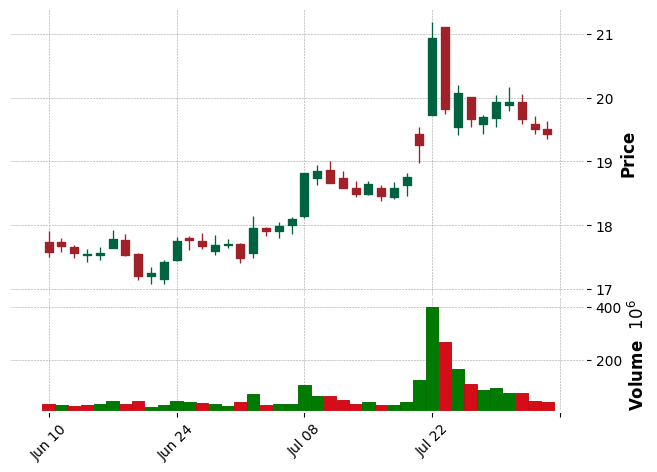

In [123]:
import yfinance as yf

ticker_symbol = "600031.SS"

# 使用 Ticker 类
stock = yf.Ticker(ticker_symbol)

# 获取历史数据
data = stock.history(period="1y", interval="1d")

# 3. 计算均线 (Moving Averages)
# rolling(window=n) 表示计算过去 n 天的滑动窗口
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA60'] = data['Close'].rolling(window=60).mean()

data_tem = data.iloc[-140:-100,:]
mpf.plot(data_tem, type='candle', style='charles', volume=True)

In [124]:
data_tem.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA5,MA20,MA60
Date,,,,,,,,,,
2025-06-10 00:00:00+08:00,17.744626,17.909018,17.502874,17.580235,34794714,0.00,0.0,17.700144,18.191385,18.552402
2025-06-11 00:00:00+08:00,17.738081,17.807139,17.580234,17.669024,32908794,0.36,0.0,17.694694,18.111694,18.521970
2025-06-12 00:00:00+08:00,17.659158,17.698621,17.481579,17.560503,26177740,0.00,0.0,17.677209,18.043017,18.491664
2025-06-13 00:00:00+08:00,17.530907,17.629562,17.422386,17.550638,33272144,0.00,0.0,17.615203,17.992220,18.453941
2025-06-16 00:00:00+08:00,17.530907,17.659157,17.461849,17.570368,33913711,0.00,0.0,17.586153,17.937574,18.417513


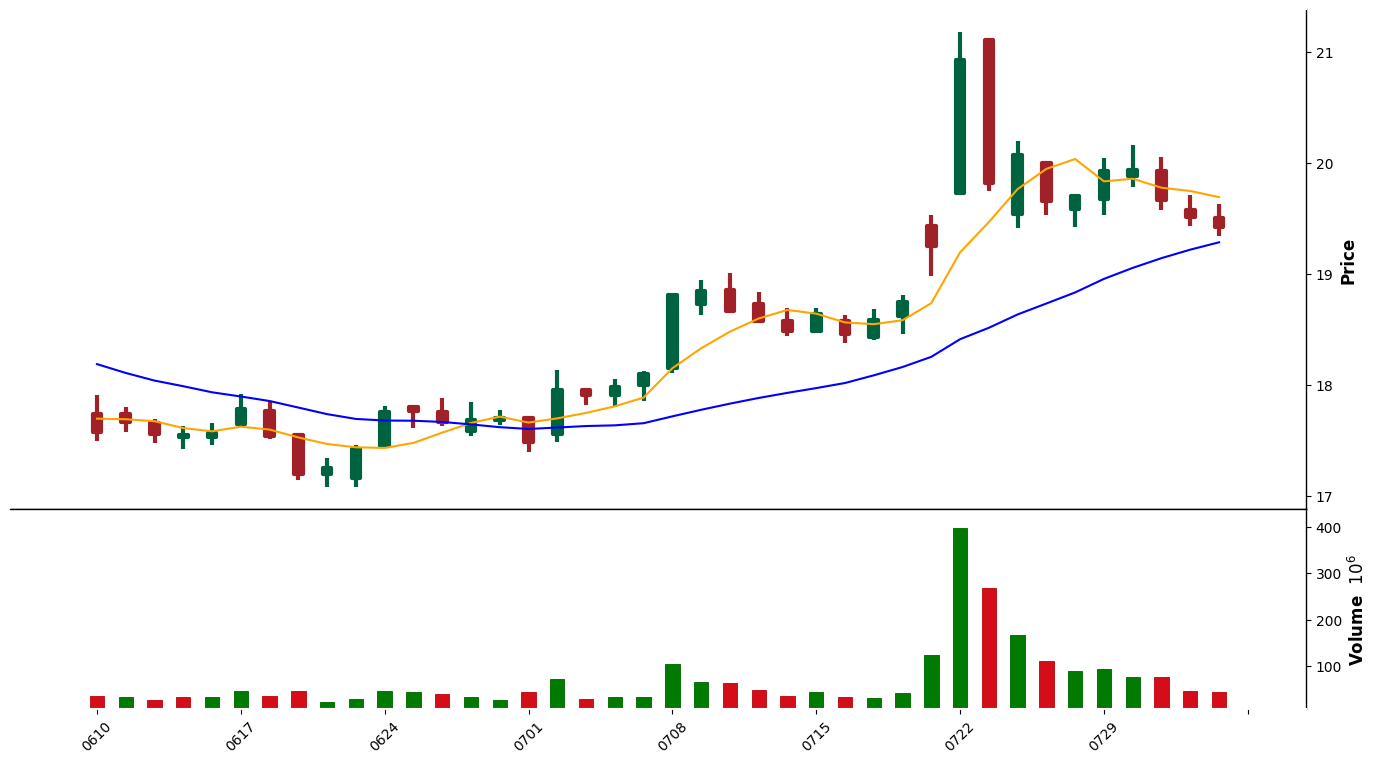

In [126]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.ticker as ticker  # 1. 引入这个库

# 【核心代码】设置全局 DPI 为 150 (或更高)
plt.rcParams['figure.dpi'] = 600
my_style = mpf.make_mpf_style(base_mpf_style='charles', rc={'axes.grid': False},
    # gridaxis='off',   # 【关键】告诉 mpf 不要画网格轴
    gridstyle=''      # 【关键】把网格样式设空)
)

ap = [
    mpf.make_addplot(data_tem['MA5'], color='orange', width=1.5, panel=0),
    mpf.make_addplot(data_tem['MA20'], color='blue', width=1.5, panel=0)
]

fig, axes = mpf.plot(data_tem, type='candle',
    style=my_style,  # 使用自定义样式
    # style='charles',
    datetime_format='%m%d',
    # 【关键修改】去掉 mav=(5,20)，改为使用 addplot
    addplot=ap,
    # mav=(5,20), 
    volume=True ,
  
    update_width_config=dict(
            candle_width=0.3,  # K线实体宽度 (越小间隔越大)
            volume_width=0.5,   # 成交量柱子宽度 (保持和K线一致)
            candle_linewidth=3.0,  # 影线(Wick)和实体边框的粗细 (默认通常是 1.0-1.5)
            # volume_linewidth=5.0   # 成交量柱子边框的粗细
        ),
    figsize=(18, 10),
    # savefig=dict(fname='high_quality_chart.png', dpi=600, bbox_inches='tight'),
    # savefig=dict(fname='chart_vector.svg', bbox_inches='tight'),
    # figscale=2.0
    # 【关键】开启返回对象
    returnfig=True
)

# 3. 设置 X 轴每隔 5 个点显示一个标签
# axes[0] 是主图（K线图）
# MultipleLocator(5) 表示刻度间隔为 5 (即每 5 行数据标一个)
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
# 2. 【修改】先关网格
# for ax in axes:
#     ax.grid(False)
# 4. 在 Notebook 中显示图表
# 直接输入 fig 即可显示；如果是脚本运行则用 mpf.show() 或 plt.show()


# 2. 设置子图垂直间距 (分开纵坐标)
# hspace=0.1 表示间距占子图高度的 10%
# 你可以调整这个数字来控制分开的距离
# fig.subplots_adjust(hspace=0.1)
fig.subplots_adjust(hspace=0.1)

# 给 K线图底部加一条线
axes[0].spines['bottom'].set_visible(True) # 显示底边框
axes[0].spines['bottom'].set_linewidth(1)  # 线宽
axes[0].spines['bottom'].set_color('black') # 颜色

# 给 成交量图顶部加一条线
axes[2].spines['top'].set_visible(True)    # 显示顶边框
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['top'].set_color('black')

# (可选) 开启右边框
axes[0].spines['right'].set_visible(True)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['right'].set_color('black')

# 1. 设置 K线主图 (axes[0])
# 开启左边框 (左Y轴线)
# axes[0].spines['left'].set_visible(True)
# axes[0].spines['left'].set_linewidth(1)  # 线宽
# axes[0].spines['left'].set_color('black')

# axes[2].spines['left'].set_visible(True)
# axes[2].spines['left'].set_linewidth(1)
# axes[2].spines['left'].set_color('black')

axes[2].spines['right'].set_visible(True)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['right'].set_color('black')

fig.savefig('chart_vector.svg', bbox_inches='tight')
fig.savefig('high_quality_chart.png', dpi=600, bbox_inches='tight')

# fig